
  gri30:

       temperature             300  K
          pressure          101325  Pa
           density         1.12252  kg/m^3
  mean mol. weight         27.6332  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -2.5459e+05       -7.035e+06     J
   internal energy     -3.4486e+05       -9.529e+06     J
           entropy          7247.8        2.003e+05     J/K
    Gibbs function     -2.4289e+06       -6.712e+07     J
 heat capacity c_p          1077.3        2.977e+04     J/K
 heat capacity c_v          776.45        2.146e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.190114         0.220149         -26.3339
               CH4       0.095057        0.0551863         -54.6761
                N2       0.714829         0.724665         -23.3688
     [  +50 minor]        

     582.0,     1446.6, 27954453.6      0.018,      0.162,      0.001
     583.0,     1544.0, 29377881.4      0.018,      0.152,      0.002
     584.0,     1846.2, 34335516.7      0.018,      0.122,      0.005
     585.0,     3114.8, 50960658.3      0.021,      0.009,      0.076
     586.0,     3053.9, 45076001.1      0.023,      0.008,      0.077
     587.0,     3010.7, 41253013.5      0.025,      0.007,      0.078
     588.0,     2978.0, 38543199.4      0.026,      0.007,      0.079
     589.0,     2952.3, 36512356.3      0.028,      0.006,      0.079
     590.0,     2931.3, 34930364.8      0.029,      0.006,      0.080
     591.0,     2914.0, 33662596.9      0.030,      0.006,      0.080
     592.0,     2899.3, 32624445.3      0.030,      0.006,      0.080
     593.0,     2886.8, 31759767.0      0.031,      0.005,      0.080
     594.0,     2876.0, 31029677.2      0.032,      0.005,      0.081
     595.0,     2866.6, 30406296.5      0.032,      0.005,      0.081
     596.0,     2858

    1353.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1354.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1355.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1356.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1357.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1358.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1359.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1360.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1361.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1362.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1363.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1364.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1365.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1366.0,     2783.4, 25331250.0      0.037,      0.004,      0.083
    1367.0,     2783

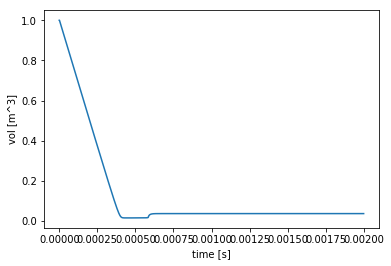

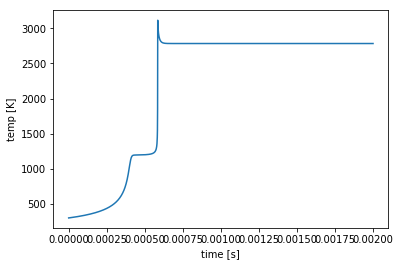

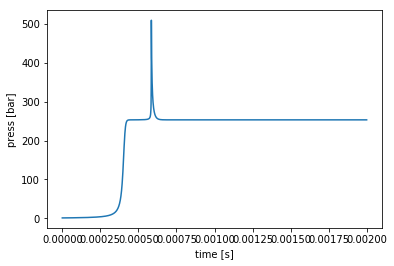

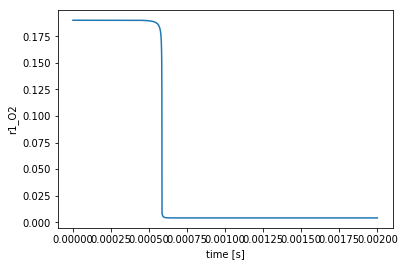

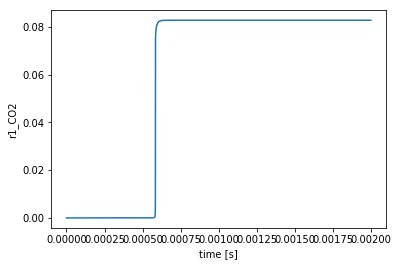

In [51]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#####################################################################################################################
#                                                                                                                   #
#                                              Specifing Input Values                                               #
#                                                                                                                   #
#####################################################################################################################

#define gasses using reaction mechanism GRI-Mech 3.0

fuel = ct.Solution('gri30.xml')
air_cpr = ct.Solution('gri30.xml')
air = ct.Solution('gri30.xml')


fuel.TPX = 300, ct.one_atm, 'CH4:1.0, O2:2.0, N2:7.52'
fuel()
air_cpr.TPX = 300, 250*ct.one_atm, 'O2:1.0, N:3.76'
air.TPX = 300, ct.one_atm, 'O2:1.0, N:3.76'
#let user choose a mixture

#fuel = input("Choose fuel for stoichometric mixture (methane/ethane/propane): ")

#if fuel == "methane":
#    gas.X = 'CH4:1.0, O2:2.0, N2:7.52'
#elif fuel == "ethane":
#    gas.X = 'C2H6:1, O2:3.5, N2:13.16'
#elif fuel == "propane":
#    gas.X = 'C3H8:1, O2:5.0, N2:18.8'
#else:
#    print("Specified fuel not available. Write 'methane', 'ethane' or 'propane'.")

def vel(vol):
    if vol > 1.0/20.0:
        return -50
    else:
        return 50
      

r1 = ct.Reactor(fuel)
r1.volume = 1.0
case = ct.Reservoir(air_cpr)
env = ct.Reservoir(air)
piston = ct.Wall(case, r1, K = 1e-4)
exhaust = ct.Valve(r1, env, K = k_v)

sim = ct.ReactorNet([r1])

times = np.zeros(2000)
r1_temp = np.zeros_like(times)
r1_press = np.zeros_like(times)
r1_vol = np.zeros_like(times)
r1_O2 = np.zeros_like(times)
r1_CO2 = np.zeros_like(times)

for n in range(2000):
    t_i=n*1e-6
    vel(r1.volume)
    times[n] = t_i
    r1_temp[n] = r1.T
    r1_press[n] = 1.0e-5*r1.thermo.P
    r1_vol[n] = r1.volume
    r1_O2[n] = r1.thermo['O2'].X
    r1_CO2[n] = r1.thermo['CO2'].X
    print('%10.1f, %10.1f, %10.1f %10.3f, %10.3f, %10.3f' % (n, r1.T, r1.thermo.P, r1.volume, r1.thermo['O2'].X, r1.thermo['CO2'].X))
    sim.advance(t_i)

    
plt.plot(times, r1_vol)
plt.xlabel('time [s]')
plt.ylabel('vol [m^3]')
plt.show()

plt.plot(times, r1_temp)
plt.xlabel('time [s]')
plt.ylabel('temp [K]')
plt.show()

plt.plot(times, r1_press)
plt.xlabel('time [s]')
plt.ylabel('press [bar]')
plt.show()

plt.plot(times, r1_O2)
plt.xlabel('time [s]')
plt.ylabel('r1_O2')
plt.show()

plt.plot(times, r1_CO2)
plt.xlabel('time [s]')
plt.ylabel('r1_CO2')
plt.show()